In [ ]:
import pandas as pd
import numpy as np
df1=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
df1.drop('time', axis=1, inplace=True)

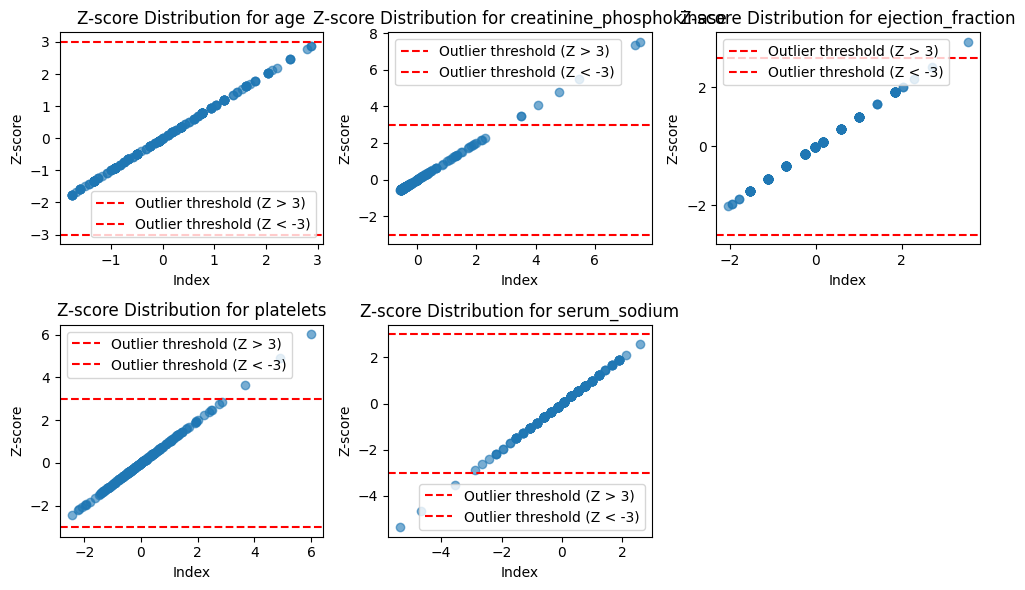

Outliers detected:
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    NaN      NaN                       NaN       NaN                NaN   
1    NaN      NaN                   7.51464       NaN                NaN   
2    NaN      NaN                       NaN       NaN                NaN   
3    NaN      NaN                       NaN       NaN                NaN   
4    NaN      NaN                       NaN       NaN                NaN   
..   ...      ...                       ...       ...                ...   
294  NaN      NaN                       NaN       NaN                NaN   
295  NaN      NaN                       NaN       NaN                NaN   
296  NaN      NaN                       NaN       NaN                NaN   
297  NaN      NaN                       NaN       NaN                NaN   
298  NaN      NaN                       NaN       NaN                NaN   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium 

In [ ]:
#visualization of outliers

import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
columns_to_check = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']

# Calculate Z-scores for the selected columns and replace the original columns with their Z-scores
for column in columns_to_check:
    df1[column] = zscore(df1[column])

# Plot Z-scores for each column using scatter plots to identify outliers
plt.figure(figsize=(10, 6))

for i, column in enumerate(columns_to_check):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    plt.scatter(df1[column], df1[column], alpha=0.6)  # Scatter plot for Z-scores
    plt.axhline(y=3, color='red', linestyle='dashed', label='Outlier threshold (Z > 3)')
    plt.axhline(y=-3, color='red', linestyle='dashed', label='Outlier threshold (Z < -3)')
    plt.title(f'Z-score Distribution for {column}')
    plt.xlabel('Index')
    plt.ylabel('Z-score')
    plt.legend()

plt.tight_layout()
plt.show()

# Check rows with Z-scores greater than 3 or less than -3 (outliers)
outliers = df1[(df1[columns_to_check] > 3) | (df1[columns_to_check] < -3)]
print(f"Outliers detected:\n{outliers}")

In [ ]:
#checking for outliers

# Assuming your Z-scores are already in the dataset (e.g., 'age', 'creatinine_phosphokinase', etc.)
columns_to_check = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']

# Initialize a dictionary to store the count of outliers for each column
outliers_count = {}

# Check how many values are greater than 3 or less than -3 for each Z-score column
for column in columns_to_check:
    greater_than_3 = df1[df1[column] > 3]
    less_than_minus_3 = df1[df1[column] < -3]

    outliers_count[column] = {
        "greater_than_3": len(greater_than_3),
        "less_than_minus_3": len(less_than_minus_3)
    }

# Print out the count of outliers for each column
for column, counts in outliers_count.items():
    print(f"Column: {column}")
    print(f"  Values greater than 3: {counts['greater_than_3']}")
    print(f"  Values less than -3: {counts['less_than_minus_3']}")
    print('-' * 30)

Column: age
  Values greater than 3: 0
  Values less than -3: 0
------------------------------
Column: creatinine_phosphokinase
  Values greater than 3: 7
  Values less than -3: 0
------------------------------
Column: ejection_fraction
  Values greater than 3: 1
  Values less than -3: 0
------------------------------
Column: platelets
  Values greater than 3: 3
  Values less than -3: 0
------------------------------
Column: serum_sodium
  Values greater than 3: 0
  Values less than -3: 3
------------------------------


In [ ]:
#conversion of outliers to 3 (which are >3) or -3 (which are <-3)

# Assuming your Z-scores are already in the dataset (e.g., 'age', 'creatinine_phosphokinase', etc.)
columns_to_check = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']

# Modify the Z-scores in place
for column in columns_to_check:
    df1[column] = df1[column].apply(lambda x: 3 if x > 3 else (-3 if x < -3 else x))

# Verify the changes by checking the updated Z-scores
print(df1[columns_to_check].head())

        age  creatinine_phosphokinase  ejection_fraction     platelets  \
0  1.192945                  0.000166          -1.530560  1.681648e-02   
1 -0.491279                  3.000000          -0.007077  7.535660e-09   
2  0.350833                 -0.449939          -1.530560 -1.038073e+00   
3 -0.912335                 -0.486071          -1.530560 -5.464741e-01   
4  0.350833                 -0.435486          -1.530560  6.517986e-01   

   serum_sodium  
0     -1.504036  
1     -0.141976  
2     -1.731046  
3      0.085034  
4     -3.000000  


In [ ]:
#Result shows no outliers

# Assuming your Z-scores are already in the dataset (e.g., 'age', 'creatinine_phosphokinase', etc.)
columns_to_check = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']

# Initialize a dictionary to store the count of outliers for each column
outliers_count = {}

# Check how many values are greater than 3 or less than -3 for each Z-score column
for column in columns_to_check:
    greater_than_3 = df1[df1[column] > 3]
    less_than_minus_3 = df1[df1[column] < -3]

    outliers_count[column] = {
        "greater_than_3": len(greater_than_3),
        "less_than_minus_3": len(less_than_minus_3)
    }

# Print out the count of outliers for each column
for column, counts in outliers_count.items():
    print(f"Column: {column}")
    print(f"  Values greater than 3: {counts['greater_than_3']}")
    print(f"  Values less than -3: {counts['less_than_minus_3']}")
    print('-' * 30)

Column: age
  Values greater than 3: 0
  Values less than -3: 0
------------------------------
Column: creatinine_phosphokinase
  Values greater than 3: 0
  Values less than -3: 0
------------------------------
Column: ejection_fraction
  Values greater than 3: 0
  Values less than -3: 0
------------------------------
Column: platelets
  Values greater than 3: 0
  Values less than -3: 0
------------------------------
Column: serum_sodium
  Values greater than 3: 0
  Values less than -3: 0
------------------------------


Best Subset: ('age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking')
Best Score: 0.7693220338983051
True Negative (TN): 47
False Positive (FP): 6
False Negative (FN): 26
True Positive (TP): 11

Precision: 0.6471
Recall: 0.2973
F1-Score: 0.4074


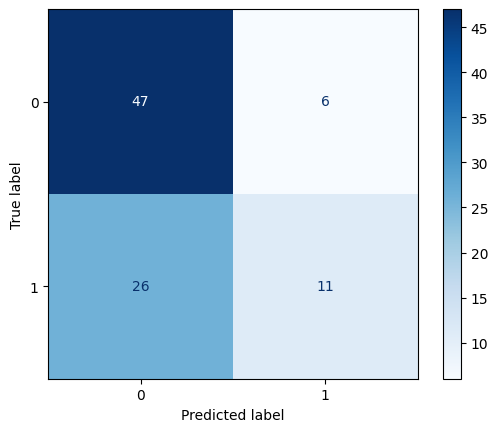

In [ ]:
#BSS SVM Matrix

from itertools import combinations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with features and target
X = df1.iloc[:, :-1]  # Feature columns
y = df1.iloc[:, -1]   # Target variable

best_score = 0
best_subset = None

# Define the SVM classification model
clf = SVC(kernel='linear', random_state=42)  # Linear kernel for simplicity

# Loop through all subset sizes
for k in range(1, len(X.columns) + 1):
    for subset in combinations(X.columns, k):
        X_subset = X[list(subset)]

        # Evaluate model performance using cross-validation
        score = cross_val_score(clf, X_subset, y, cv=5, scoring='accuracy').mean()

        # Update best score and subset if the current score is better
        if score > best_score:
            best_score = score
            best_subset = subset

print("Best Subset:", best_subset)
print("Best Score:", best_score)

# Split the data into training and testing sets using the best subset
X_best = X[list(best_subset)]
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

# Train the model on the best subset
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='binary')  # Adjust `average` if multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display the plot
plt.show()

Best Subset: ('age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium')
Best Score: 0.7726553672316385
True Negative (TN): 48
False Positive (FP): 5
False Negative (FN): 26
True Positive (TP): 11

Precision: 0.6875
Recall: 0.2973
F1-Score: 0.4151


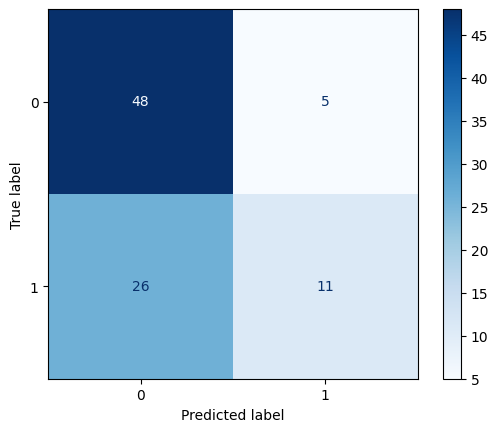

In [ ]:
#BSS RF Matrix

from itertools import combinations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with features and target
X = df1.iloc[:, :-1]  # Feature columns
y = df1.iloc[:, -1]   # Target variable

best_score = 0
best_subset = None

# Define the Random Forest classification model
clf = RandomForestClassifier(random_state=42)

# Loop through all subset sizes
for k in range(1, len(X.columns) + 1):
    for subset in combinations(X.columns, k):
        X_subset = X[list(subset)]

        # Evaluate model performance using cross-validation
        score = cross_val_score(clf, X_subset, y, cv=5, scoring='accuracy').mean()

        # Update best score and subset if the current score is better
        if score > best_score:
            best_score = score
            best_subset = subset

print("Best Subset:", best_subset)
print("Best Score:", best_score)

# Use the best subset for training and testing
X_best = X[list(best_subset)]
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

# Train the Random Forest model on the selected features
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')  # Adjust `average` for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display the confusion matrix plot
plt.show()

Best Subset: ('ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex')
Best Score: 0.7726553672316384
True Negative (TN): 50
False Positive (FP): 3
False Negative (FN): 27
True Positive (TP): 10

Precision: 0.7692
Recall: 0.2703
F1-Score: 0.4000


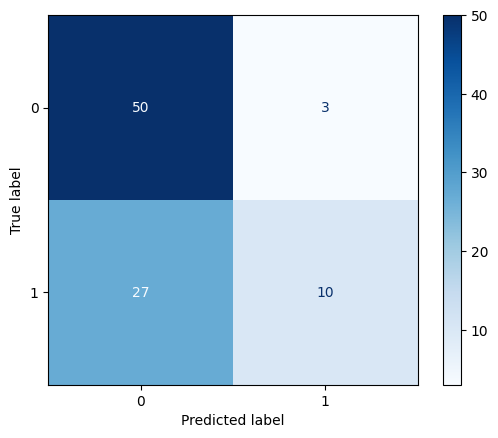

In [ ]:
#bss logistic

from itertools import combinations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with features and target
X = df1.iloc[:, :-1]  # Feature columns
y = df1.iloc[:, -1]   # Target variable

best_score = 0
best_subset = None

# Define the Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)

# Loop through all subset sizes
for k in range(1, len(X.columns) + 1):
    for subset in combinations(X.columns, k):
        X_subset = X[list(subset)]

        # Evaluate model performance using cross-validation
        score = cross_val_score(clf, X_subset, y, cv=5, scoring='accuracy').mean()

        # Update best score and subset if the current score is better
        if score > best_score:
            best_score = score
            best_subset = subset

print("Best Subset:", best_subset)
print("Best Score:", best_score)

# Use the best subset for training and testing
X_best = X[list(best_subset)]
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model on the selected features
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')  # Adjust `average` for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display the confusion matrix plot
plt.show()

All Subsets and Their Scores:
Subset: ['serum_creatinine'], Score: 0.7228
Subset: ['serum_creatinine', 'ejection_fraction'], Score: 0.7657
Subset: ['serum_creatinine', 'ejection_fraction', 'age'], Score: 0.7750
Subset: ['serum_creatinine', 'ejection_fraction', 'age', 'creatinine_phosphokinase'], Score: 0.7751

Best Subset: ['serum_creatinine', 'ejection_fraction', 'age', 'creatinine_phosphokinase']
Best Score: 0.7751451800232287

Accuracy with selected features: 0.6556
Precision: 0.6500
Recall: 0.3514
F1-Score: 0.4561
True Negative (TN): 46
False Positive (FP): 7
False Negative (FN): 24
True Positive (TP): 13


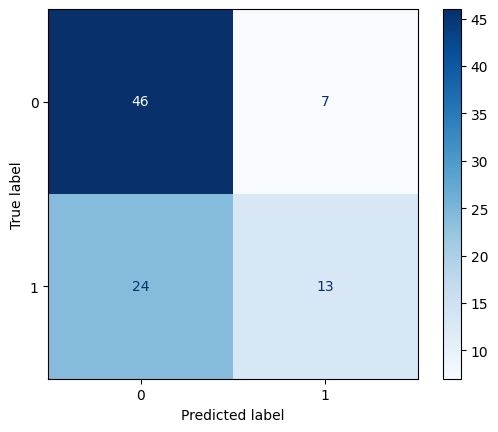

In [ ]:
#FSS SVM Matrix

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with features and target
X = df1.iloc[:, :-1]  # Feature columns
y = df1.iloc[:, -1]   # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the classification model (SVM)
clf = SVC(kernel='linear', random_state=42)  # Using a linear kernel for simplicity

# Initialize variables
remaining_features = list(X.columns)  # Features to select from
selected_features = []  # Features selected for the model
best_score = 0
all_subsets = []  # To store all subsets and their scores

# Forward Stepwise Selection
while remaining_features:
    scores_with_candidates = []

    for candidate in remaining_features:
        # Create a subset with selected features + current candidate
        current_subset = selected_features + [candidate]
        X_subset = X_train[current_subset]

        # Evaluate model performance using cross-validation
        score = cross_val_score(clf, X_subset, y_train, cv=5, scoring='accuracy').mean()
        scores_with_candidates.append((candidate, score))

    # Select the feature that gives the best score
    scores_with_candidates.sort(key=lambda x: x[1], reverse=True)
    best_candidate, best_candidate_score = scores_with_candidates[0]

    # Update the best subset and score if it improves
    if best_candidate_score > best_score:
        selected_features.append(best_candidate)
        remaining_features.remove(best_candidate)
        best_score = best_candidate_score
        all_subsets.append((list(selected_features), best_score))
    else:
        break  # Stop if no improvement

# Print all subsets with their scores
print("All Subsets and Their Scores:")
for subset, score in all_subsets:
    print(f"Subset: {subset}, Score: {score:.4f}")

# Print the best subset and its score
print("\nBest Subset:", selected_features)
print("Best Score:", best_score)

# Use the best subset for final model training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train SVM on the selected features
clf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with selected features: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')  # Adjust `average` for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Display the confusion matrix plot
plt.show()

Selected Features (Logistic Regression): ['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'sex']
Accuracy of Logistic Regression with selected features: 0.6778
Precision: 0.7500
Recall: 0.3243
F1-Score: 0.4528
True Negative (TN): 49
False Positive (FP): 4
False Negative (FN): 25
True Positive (TP): 12


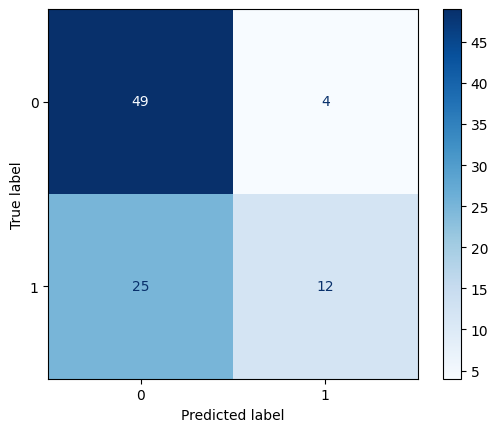

In [ ]:
#FSS Random forest


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with features and target
X = df1.iloc[:, :-1]  # Feature columns
y = df1.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RFE with Logistic Regression
n_features_to_select = 5  # Specify the number of features to select
rfe_logistic = RFE(estimator=logistic_model, n_features_to_select=n_features_to_select)

# Fit RFE
rfe_logistic.fit(X_train, y_train)

# Get selected features
selected_features_logistic = X.columns[rfe_logistic.support_]
print("Selected Features (Logistic Regression):", selected_features_logistic.tolist())

# Use only the selected features for training and testing
X_train_selected = X_train[selected_features_logistic]
X_test_selected = X_test[selected_features_logistic]

# Train Logistic Regression on the selected features
logistic_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_selected)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy of Logistic Regression with selected features: {accuracy_logistic:.4f}")

# Calculate precision, recall, and F1-score
precision_logistic = precision_score(y_test, y_pred_logistic, average='binary')  # Adjust `average` for multi-class
recall_logistic = recall_score(y_test, y_pred_logistic, average='binary')
f1_logistic = f1_score(y_test, y_pred_logistic, average='binary')

print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")

# Generate confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm_logistic.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Display the confusion matrix plot
plt.show()

All Subsets and Their Scores:
Subset: ['ejection_fraction'], Score: 0.7358
Subset: ['ejection_fraction', 'serum_creatinine'], Score: 0.7492
Subset: ['ejection_fraction', 'serum_creatinine', 'serum_sodium'], Score: 0.7627

Best Subset: ['ejection_fraction', 'serum_creatinine', 'serum_sodium']
Best Score: 0.7626553672316384
True Negative (TN): 49
False Positive (FP): 4
False Negative (FN): 28
True Positive (TP): 9

Precision: 0.6923
Recall: 0.2432
F1-Score: 0.3600


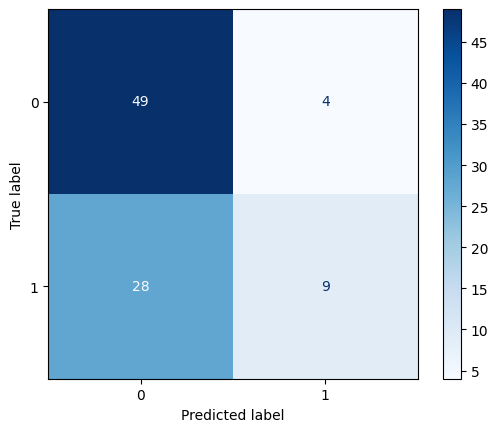

In [ ]:
#fss with logistic regression


from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with features and target
X = df1.iloc[:, :-1]  # Feature columns
y = df1.iloc[:, -1]   # Target variable

# Define the classification model
clf = LogisticRegression(random_state=42, max_iter=1000)

# Initialize variables
remaining_features = list(X.columns)  # Features to select from
selected_features = []  # Features selected for the model
best_score = 0
all_subsets = []  # To store all subsets and their scores

# Forward Stepwise Selection
while remaining_features:
    scores_with_candidates = []

    for candidate in remaining_features:
        # Create a subset with selected features + current candidate
        current_subset = selected_features + [candidate]
        X_subset = X[current_subset]

        # Evaluate model performance using cross-validation
        score = cross_val_score(clf, X_subset, y, cv=5, scoring='accuracy').mean()
        scores_with_candidates.append((candidate, score))

    # Select the feature that gives the best score
    scores_with_candidates.sort(key=lambda x: x[1], reverse=True)
    best_candidate, best_candidate_score = scores_with_candidates[0]

    # Update the best subset and score if it improves
    if best_candidate_score > best_score:
        selected_features.append(best_candidate)
        remaining_features.remove(best_candidate)
        best_score = best_candidate_score
        all_subsets.append((list(selected_features), best_score))
    else:
        break  # Stop if no improvement

# Print all subsets with their scores
print("All Subsets and Their Scores:")
for subset, score in all_subsets:
    print(f"Subset: {subset}, Score: {score:.4f}")

# Print the best subset and its score
print("\nBest Subset:", selected_features)
print("Best Score:", best_score)

# Split the data into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

# Train the model on the selected features
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display the plot
plt.show()

Best Subset: ('ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex')
Best Score: 0.7726553672316384
True Negative (TN): 50
False Positive (FP): 3
False Negative (FN): 27
True Positive (TP): 10

Precision: 0.7692
Recall: 0.2703
F1-Score: 0.4000


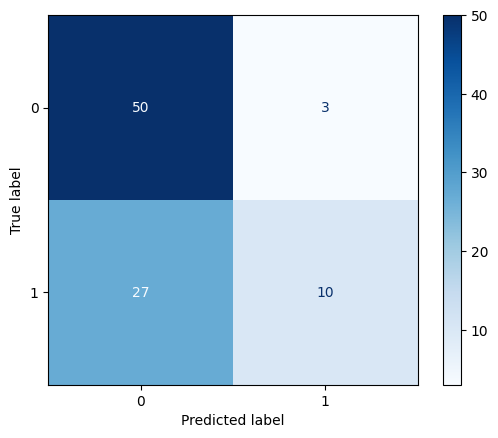

In [ ]:
#RFE SVM


from itertools import combinations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with features and target
X = df1.iloc[:, :-1]  # Feature columns
y = df1.iloc[:, -1]   # Target variable

best_score = 0
best_subset = None

# Define the Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)

# Loop through all subset sizes
for k in range(1, len(X.columns) + 1):
    for subset in combinations(X.columns, k):
        X_subset = X[list(subset)]

        # Evaluate model performance using cross-validation
        score = cross_val_score(clf, X_subset, y, cv=5, scoring='accuracy').mean()

        # Update best score and subset if the current score is better
        if score > best_score:
            best_score = score
            best_subset = subset

print("Best Subset:", best_subset)
print("Best Score:", best_score)

# Use the best subset for training and testing
X_best = X[list(best_subset)]
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model on the selected features
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')  # Adjust `average` for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display the confusion matrix plot
plt.show()

Selected Features (Random Forest): ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine']
Accuracy of Random Forest with selected features: 0.6889
Precision: 0.6800
Recall: 0.4595
F1-Score: 0.5484
True Negative (TN): 45
False Positive (FP): 8
False Negative (FN): 20
True Positive (TP): 17


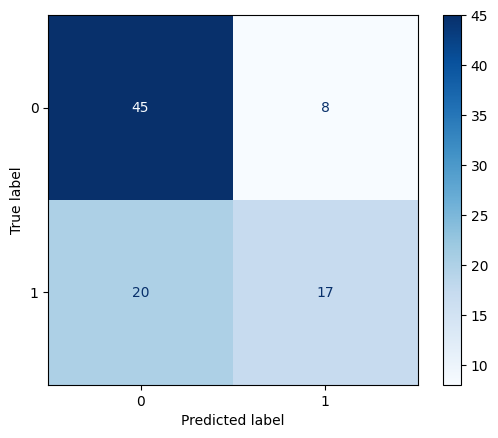

In [ ]:
#RFE Randomforest


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with features and target
X = df1.iloc[:, :-1]  # Feature columns
y = df1.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RFE with Random Forest
n_features_to_select = 5  # Specify the number of features to select
rfe_rf = RFE(estimator=rf_model, n_features_to_select=n_features_to_select)

# Fit RFE
rfe_rf.fit(X_train, y_train)

# Get selected features
selected_features_rf = X.columns[rfe_rf.support_]
print("Selected Features (Random Forest):", selected_features_rf.tolist())

# Use only the selected features for training and testing
X_train_selected = X_train[selected_features_rf]
X_test_selected = X_test[selected_features_rf]

# Train Random Forest on the selected features
rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_selected)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest with selected features: {accuracy_rf:.4f}")

# Calculate precision, recall, and F1-score
precision_rf = precision_score(y_test, y_pred_rf, average='binary')  # Adjust `average` for multi-class
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm_rf.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Display the confusion matrix plot
plt.show()

Selected Features (Logistic Regression): ['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'sex']
Accuracy of Logistic Regression with selected features: 0.6778
Precision: 0.7500
Recall: 0.3243
F1-Score: 0.4528
True Negative (TN): 49
False Positive (FP): 4
False Negative (FN): 25
True Positive (TP): 12


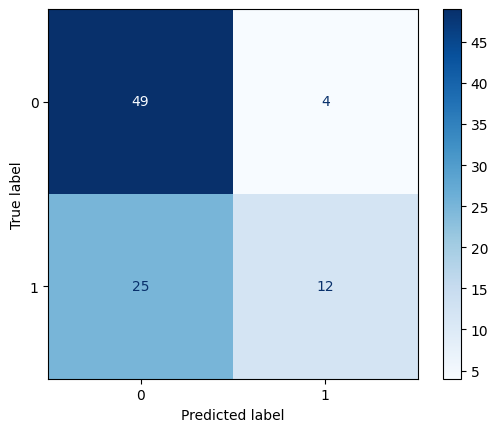

In [ ]:
##rfe logistic


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with features and target
X = df1.iloc[:, :-1]  # Feature columns
y = df1.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RFE with Logistic Regression
n_features_to_select = 5  # Specify the number of features to select
rfe_logistic = RFE(estimator=logistic_model, n_features_to_select=n_features_to_select)

# Fit RFE
rfe_logistic.fit(X_train, y_train)

# Get selected features
selected_features_logistic = X.columns[rfe_logistic.support_]
print("Selected Features (Logistic Regression):", selected_features_logistic.tolist())

# Use only the selected features for training and testing
X_train_selected = X_train[selected_features_logistic]
X_test_selected = X_test[selected_features_logistic]

# Train Logistic Regression on the selected features
logistic_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_selected)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy of Logistic Regression with selected features: {accuracy_logistic:.4f}")

# Calculate precision, recall, and F1-score
precision_logistic = precision_score(y_test, y_pred_logistic, average='binary')  # Adjust `average` for multi-class
recall_logistic = recall_score(y_test, y_pred_logistic, average='binary')
f1_logistic = f1_score(y_test, y_pred_logistic, average='binary')

print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")

# Generate confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm_logistic.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Display the confusion matrix plot
plt.show()

Initial VIF values:
                     Feature       VIF
0                        age  1.050512
1                    anaemia  1.670791
2   creatinine_phosphokinase  1.076714
3                   diabetes  1.497730
4          ejection_fraction  1.061823
5        high_blood_pressure  1.423819
6                  platelets  1.040737
7           serum_creatinine  2.249684
8               serum_sodium  1.089497
9                        sex  2.843180
10                   smoking  1.864671

Selected features with VIF < 1.2: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']

Accuracy of the model with selected features: 68.89%
True Negative (TN): 50
False Positive (FP): 3
False Negative (FN): 25
True Positive (TP): 12

Precision: 0.8000
Recall: 0.3243
F1-Score: 0.4615


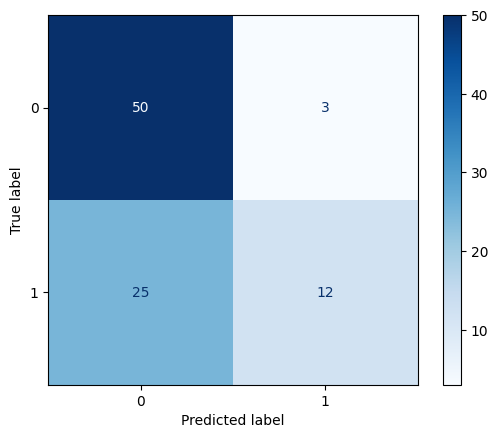

In [ ]:
#vif with  randomforest


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with features and target
X = df1.iloc[:, :-1]  # Feature columns
y = df1.iloc[:, -1]   # Target variable

# Calculate VIF for all features
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i)
        for i in range(X.shape[1])
    ]
    return vif_data

# Calculate initial VIF values
vif_df = calculate_vif(X)
print("Initial VIF values:")
print(vif_df)

# Select features with VIF below a threshold (e.g., 1.2)
threshold = 1.2
low_vif_features = vif_df[vif_df["VIF"] < threshold]["Feature"].tolist()
print(f"\nSelected features with VIF < {threshold}: {low_vif_features}")

# Filter the dataset to keep only low VIF features
X_low_vif = X[low_vif_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_low_vif, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier on the selected features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate model performance
accuracy = clf.score(X_test, y_test)
print(f"\nAccuracy of the model with selected features: {accuracy * 100:.2f}%")

# Make predictions
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display the plot
plt.show()

Initial VIF values:
                     Feature       VIF
0                        age  1.050512
1                    anaemia  1.670791
2   creatinine_phosphokinase  1.076714
3                   diabetes  1.497730
4          ejection_fraction  1.061823
5        high_blood_pressure  1.423819
6                  platelets  1.040737
7           serum_creatinine  2.249684
8               serum_sodium  1.089497
9                        sex  2.843180
10                   smoking  1.864671

Selected features with VIF < 1.2: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']

Accuracy of the SVM model with selected features: 62.22%
True Negative (TN): 49
False Positive (FP): 4
False Negative (FN): 30
True Positive (TP): 7

Model Performance Metrics:
Precision: 0.64
Recall: 0.19
F1-Score: 0.29


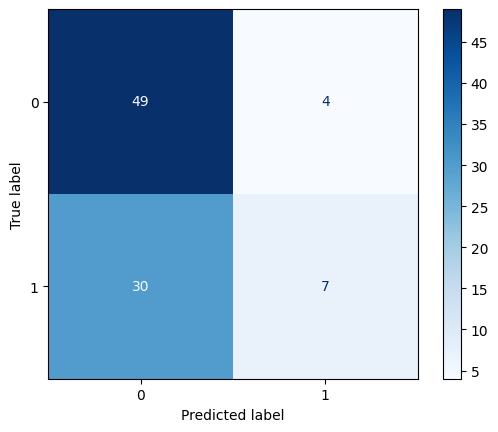

In [ ]:
#vif with  svm regression


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your DataFrame (assuming df1 contains the dataset)
# df1 = pd.read_csv('your_dataset.csv')  # Uncomment and modify as needed

# Separate features and target variable
X = df1.iloc[:, :-1]  # Features
y = df1.iloc[:, -1]   # Target variable

# Calculate VIF for all features
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i)
        for i in range(X.shape[1])
    ]
    return vif_data

# Calculate initial VIF values
vif_df = calculate_vif(X)
print("Initial VIF values:")
print(vif_df)

# Select features with VIF below a threshold (e.g., 1.2)
threshold = 1.2
low_vif_features = vif_df[vif_df["VIF"] < threshold]["Feature"].tolist()
print(f"\nSelected features with VIF < {threshold}: {low_vif_features}")

# Filter the dataset to keep only low VIF features
X_low_vif = X[low_vif_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_low_vif, y, test_size=0.3, random_state=42)

# Train an SVM model on the selected features
clf = SVC(random_state=42)  # You can specify kernel types like 'linear', 'rbf', etc.
clf.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = clf.predict(X_test)

# Evaluate model performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the SVM model with selected features: {accuracy * 100:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print metrics
print("\nModel Performance Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Display the confusion matrix plot
plt.show()

Initial VIF values:
                     Feature       VIF
0                        age  1.050512
1                    anaemia  1.670791
2   creatinine_phosphokinase  1.076714
3                   diabetes  1.497730
4          ejection_fraction  1.061823
5        high_blood_pressure  1.423819
6                  platelets  1.040737
7           serum_creatinine  2.249684
8               serum_sodium  1.089497
9                        sex  2.843180
10                   smoking  1.864671

Selected features with VIF < 1.2: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']

Accuracy of the Logistic Regression model with selected features: 65.56%
True Negative (TN): 49
False Positive (FP): 4
False Negative (FN): 27
True Positive (TP): 10

Model Performance Metrics:
Precision: 0.71
Recall: 0.27
F1-Score: 0.39


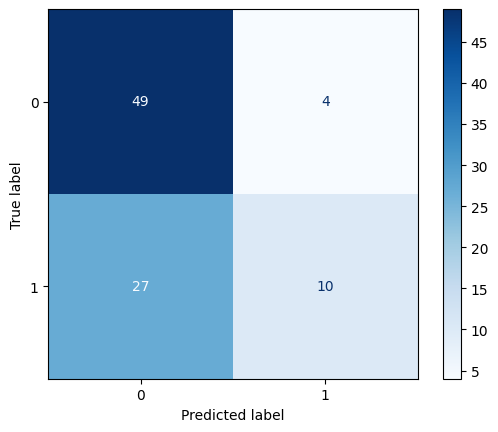

In [ ]:
#vif with  logistic regression


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your DataFrame (assuming df1 contains the dataset)
# df1 = pd.read_csv('your_dataset.csv')  # Uncomment and modify as needed

# Separate features and target variable
X = df1.iloc[:, :-1]  # Features
y = df1.iloc[:, -1]   # Target variable

# Calculate VIF for all features
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i)
        for i in range(X.shape[1])
    ]
    return vif_data

# Calculate initial VIF values
vif_df = calculate_vif(X)
print("Initial VIF values:")
print(vif_df)

# Select features with VIF below a threshold (e.g., 1.2)
threshold = 1.2
low_vif_features = vif_df[vif_df["VIF"] < threshold]["Feature"].tolist()
print(f"\nSelected features with VIF < {threshold}: {low_vif_features}")

# Filter the dataset to keep only low VIF features
X_low_vif = X[low_vif_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_low_vif, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model on the selected features
clf = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if necessary
clf.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = clf.predict(X_test)

# Evaluate model performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Logistic Regression model with selected features: {accuracy * 100:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

# Annotate confusion matrix with TP, TN, FP, FN
tn, fp, fn, tp = cm.ravel()

print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")
precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print metrics
print("\nModel Performance Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Display the confusion matrix plot
plt.show()